# Dykstra Parsons coefficient

The Dykstra–Parsons coefficient (Vk), or coefficient of variation was introduced in 1950 to evaluate the vertical heterogeneity. The coefficient is calculated using the formula of obtained the 50th and 84.1th values from the Permeability/Probability plot.

The range of this index is 0<Vk<1:

Vk=0, ideal homogeneous reservoir.

0<Vk<0.25, less heterogeneous.

0.25<Vk<0.50, heterogeneous reservoir, geometric averaging technique is applicable

0.50<Vk<0.75, the reservoir is very heterogeneous, a combination of geometric and harmonic averaging technique is necessary.

0.75<Vk<1, the reservoir is extremely heterogeneous; none of the conventional averaging techniques (arithmetic, geometric, and harmonic) are applicable in this range.

Vk =1, perfectly heterogeneous reservoir. It is unlikely that such reservoirs exist, as geologic processes of deposition and accumulation of sediments are not extreme

Note: In most reservoirs, the coefficient is between 0.5 to 0.8 

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [10]:
from numpy import random
random_core_samples=random.randint(1000,size=(105))        
sample=np.sort(random_core_samples)   
(unique,counts)=np.unique(sample,return_counts=True)     #adding freq
data=np.asarray((unique,counts)).T[::-1]                 #[::-1] desending order
data

array([[950,   1],
       [948,   1],
       [940,   1],
       [935,   1],
       [915,   1],
       [914,   1],
       [905,   1],
       [894,   1],
       [890,   1],
       [878,   1],
       [870,   1],
       [865,   1],
       [851,   1],
       [832,   1],
       [825,   1],
       [820,   1],
       [813,   1],
       [795,   1],
       [762,   1],
       [726,   1],
       [722,   1],
       [718,   1],
       [713,   1],
       [658,   1],
       [652,   1],
       [651,   1],
       [638,   2],
       [635,   1],
       [630,   1],
       [625,   1],
       [615,   2],
       [614,   1],
       [605,   1],
       [604,   1],
       [603,   1],
       [595,   1],
       [592,   1],
       [590,   1],
       [572,   1],
       [563,   1],
       [560,   1],
       [546,   1],
       [529,   1],
       [528,   1],
       [525,   1],
       [499,   1],
       [490,   1],
       [468,   1],
       [467,   1],
       [458,   1],
       [454,   1],
       [452,   1],
       [443,

In [11]:
df=pd.DataFrame(data,columns=['K_md','freq'])
df['cm_freq']=df.freq.cumsum()
df['portion_of_sample_with_higher_K']=(df.cm_freq-df.freq)/df.freq.sum()*100
df

,K_md,freq,cm_freq,portion_of_sample_with_higher_K
0,950,1,1,0.000000
1,948,1,2,0.952381
2,940,1,3,1.904762
3,935,1,4,2.857143
4,915,1,5,3.809524
...,...,...,...,...
95,51,1,101,95.238095
96,42,1,102,96.190476
97,33,1,103,97.142857
98,22,1,104,98.095238


In [12]:
df['K/P']=(df['K_md']/df['portion_of_sample_with_higher_K'])

In [13]:
portion_of_sample_with_higher_K= df.drop(['K_md','cm_freq','freq','K/P'],axis='columns')
K_md = df.K_md

In [14]:
model = linear_model.LinearRegression()
model.fit(portion_of_sample_with_higher_K,K_md)
m=float(model.coef_)                                                 
b=float(model.intercept_)                                 #y= mx+b
m,b

(-9.320381829777292, 927.1092069786384)

In [15]:
pd.options.mode.use_inf_as_na=True
df['K/P'].fillna(df['K/P'].max(),inplace=True)


Dykstra Parsons coefficient is equal to:  0.69 
Reservoir is very heterogeneous


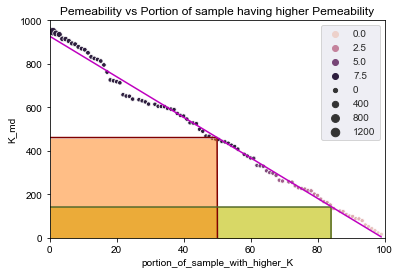

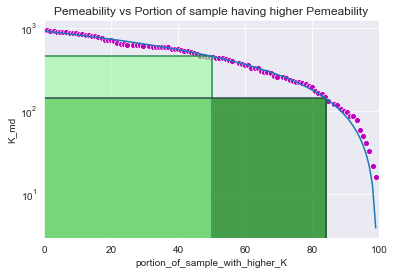

In [16]:
Vk=float((model.predict([[50]])-(model.predict([[84.1]])))/(model.predict([[50]])))
if 0.75<=Vk and Vk<1:
       print("Dykstra Parsons coefficient is equal to: ","{:.2f}".format(Vk),'\nReservoir is extreamly heterogeneous')
elif Vk>=0.5 and Vk<=0.75:
       print("Dykstra Parsons coefficient is equal to: ","{:.2f}".format(Vk),'\nReservoir is very heterogeneous')
elif Vk>=0.25 and Vk<=0.5:
       print("Dykstra Parsons coefficient is equal to: ","{:.2f}".format(Vk),'\nReservoir is heterogeneous')
elif Vk>0 and Vk<=0.25:
       print("Dykstra Parsons coefficient is equal to: ","{:.2f}".format(Vk),'\nReservoir is very less heterogeneous')
else:
        print('Kindly check agian that 0<Vk>1')

        

cmap=sns.cubehelix_palette(dark=.5,light=.2,as_cmap=True)


plt.xlim(0,100)
plt.ylim(0,1000) 
h=df.eval(df["K/P"])             
sns.set_style('darkgrid')    
plt.plot([50.1,50,0],[0,float(model.predict([[50]])),float(model.predict([[50]]))],color='maroon')
plt.plot([84.1,84.1,0],[0,float(model.predict([[84.1]])),float(model.predict([[84.1]]))],color='darkolivegreen')
plt.title('Pemeability vs Portion of sample having higher Pemeability')
sns.scatterplot(data=df,x=df.portion_of_sample_with_higher_K,y=df.K_md,hue=h,size=h,hue_norm=(0,7))
plt.plot(df.portion_of_sample_with_higher_K,(df.portion_of_sample_with_higher_K*m)+b,color='m')    
plt.stackplot([84.1,84.1,0],[0,float(model.predict([[84.1]])),float(model.predict([[84.1]]))],alpha=.6,color='y')
plt.stackplot([50,50,0],[0,float(model.predict([[50]])),float(model.predict([[50]]))],alpha=.5)
plt.show()


plt.xlim(0,100)        
plt.semilogy()
h=df.eval(df["K/P"])             
sns.set_style('darkgrid') 
plt.plot([50,50,0],[0,float(model.predict([[50]])),float(model.predict([[50]]))],color='seagreen')
plt.plot([84.1,84.1,0],[0,float(model.predict([[84.1]])),float(model.predict([[84.1]]))],color='darkslategrey')
plt.title('Pemeability vs Portion of sample having higher Pemeability')
sns.scatterplot(data=df,x=df.portion_of_sample_with_higher_K,y=df.K_md,color='m')
plt.plot(df.portion_of_sample_with_higher_K,(df.portion_of_sample_with_higher_K*m)+b)    
plt.stackplot([84.1,84.1,0],[0,float(model.predict([[84.1]])),float(model.predict([[84.1]]))],alpha=.7,color='g')
plt.stackplot([50,50,0],[0,float(model.predict([[50]])),float(model.predict([[50]]))],alpha=.6,color='palegreen')
plt.show()